In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [4]:
dummies= pd.get_dummies(df["Car Model"])
dummies=dummies.astype(int)
dummies


,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [9]:
merged=pd.concat([df,dummies],axis=1)
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [11]:
x=merged.drop(['Car Model','Mercedez Benz C class','Sell Price($)'],axis=1)
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [12]:
y=df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [14]:
model=linear_model.LinearRegression()
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
model.fit(x,y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
model.intercept_

np.float64(58976.625968537235)

In [17]:
model.score(x,y)

0.9417050937281082

In [31]:
import pickle
with open("Exercise_model",'wb') as f:
    pickle.dump(model,f)

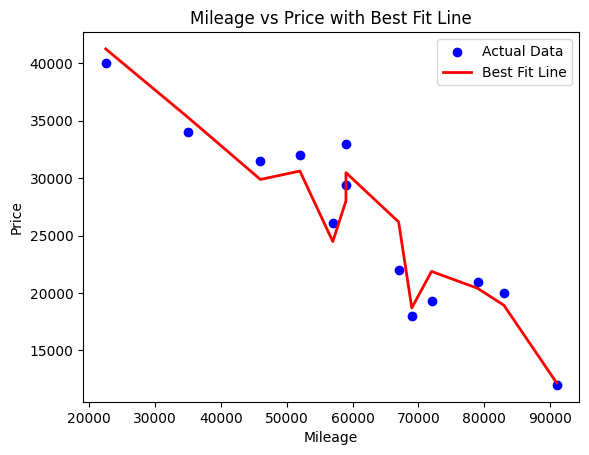

In [30]:
# Scatter plot of actual data
import numpy as np
plt.scatter(x['Mileage'], y, color='blue', label='Actual Data')

# Sort values for a clean regression line
sorted_idx = np.argsort(x['Mileage'])
mileage_sorted = x['Mileage'].iloc[sorted_idx]
pred_sorted = model.predict(x.iloc[sorted_idx])

# Regression line
plt.plot(mileage_sorted, pred_sorted, color='red', linewidth=2, label='Best Fit Line')

# Labels & title
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price with Best Fit Line')
plt.legend()
plt.show()